# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 5__

__Nombres de los estudiantes: Gema Blanco Núñez y Diego Alejandro Rodríguez Pereira__

In [1]:
RANDOM_STATE=333

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [2]:
import pandas as pd

#Crear dataframe
df = pd.read_csv('countries_of_the_world.csv')
#Eliminar la columna llamada Region (En valores de eje, 0 es para índice y 1 para columnas)
df = df.drop(['Region'],axis=1) 
#Elimnar las filas nulas
#df = df.dropna(how='all')
df = df.dropna()
df = df.reset_index(drop=True)
df

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
4,Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
175,Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
176,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
177,Zambia,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


### Comentarios

Los resultados obtenidos son 179 filas, que equivalen a **179 países**. Contrastando con otras fuentes en internet, el número de países en todo el mundo asciende a 194 (https://www.elespanol.com/curiosidades/paises/cuantos-paises-hay-mundo-numero/494701553_0.amp.html). 

Si nos paramos a analizar el funcionamiento del método dropna(), este elimina por defecto las filas con algún valor vacío (**dropna(how='any')**), pero si lo modificamos cambiando el modo (**dropna(how='all')**) eliminaremos solamente aquellas filas que tengan todos los valores nulos. Usando el método dropna(how='all') o no haciendo ningún dropna() obtenemos un resultado de 227 países, una cifra superior a la reconocida por la ONU.

La razón por la cual no se obtienen los 194 países es por la **falta de información para algunas columnas o variables** en algunos países, que son eliminados por el método dropna. Cuando nos encontramos con falta de información en alguna variable para algún individuo tenemos dos opciones: **descartar** dichos individuos o bien quedarnos con el **valor medio** para los variables vacíos. En este caso hemos optado por la primera opción ya que son pocos los individuos afectados y prescindir de ellos no supondrá un problema en el análisis de datos posterior.

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [3]:
import pandas as pd

df2 = df.loc[:, ['GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Agriculture', 'Industry', 'Service']]
df2 = df2.reset_index(drop=True)
df2

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
0,700.0,36.0,3.2,0.380,0.240,0.380
1,4500.0,86.5,71.2,0.232,0.188,0.579
2,6000.0,70.0,78.1,0.101,0.600,0.298
3,8600.0,95.0,460.0,0.040,0.180,0.780
4,11000.0,89.0,549.9,0.038,0.220,0.743
...,...,...,...,...,...,...
174,4800.0,93.4,140.1,0.040,0.419,0.541
175,2500.0,90.3,187.7,0.209,0.410,0.381
176,800.0,50.2,37.2,0.135,0.472,0.393
177,800.0,80.6,8.2,0.220,0.290,0.489


### ¿Qué crees que representan cada una de esas variables?

Analizando el contexto y la relación entre las variables creemos que estas ofrecen información acerca del **nivel de desarrollo de cada país**. Así pues, se observa por ejemplo una cierta relación directa entre el porcentaje de alfabetización de la población de un país y su PIB. 

In [4]:
# Mostrar datos estadísticos de cada columna
df2.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


### Análisis de las distribuciones de cada una de las variables

PIB(GDP) tiene un rango de valores muy altos, que a su vez tienen una desviación típica altísima en comparación al resto.
Alfabetismo (literacy), agricultura, industria y servicio son porcentajes. Pero a pesar de esto, agricultura, industria y servicio están en un rango de 0 a 1 (siendo 0 0% y 1 siendo 100%), Alfabetismo (literacy) tiene rangos de entre 0 y 100 (siendo 0 0% y 100 el 100%). Esto conllevaría que por lo menos Alfabetismo (literacy) lo escalemos para que tenga el mismo rango que los otros tres.

La única que aparenta seguir una distribución normal es la variable "servicio".
Algunas como alfabetismo, agricultura, industria y teléfonos, pensábamos que también seguían una distribución normal (con sesgos negativos y positivos) pero cuando intentamos en el siguiente apartado estandarizarlos, nos dió resultados con valores extraños, por lo cuál hemos determinado que no siguen una distrubución normal (y como se verá en el siguiente apartado, hemos normalizado)

El servicio sigue una distribución normal con distribución simétrica (ligeramente con sesgo negativo)

La variable teléfonos, se debería de cambiar de por cada 1.000 personas, a porcentaje. Y el porcentaje debería de estar entre rangos de 0 y 1. Para que de esta manera coincida con las variables agricultura, industria y servicio.

A su vez, también deberíamos de normalizar la variable PIB (GDP). Ya que esta tiene rangos de valores muy altos

In [5]:
# Correlación de Pearson
# coeficientes de correlación entre pares de variables
# Valor cercano a 1 indica correlación directa
# Valor cercano a -1 indica correlación inversa
# Valor cercano a 0 indica no correlación
df2.corr(method='pearson')

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000


### Análisis de los coeficientes de correlación

El coeficiente de correlación de Pearson nos indica el **grado de relación de dos variables**, así pues en todos los casos en los que una variable está relacionada consigo misma obtenemos una correlación directa. 

Analizando cada par de variables:

- **GDP-Literacy:** el valor de correlación es más cercano a 1 que a 0, lo que indica que el grado de alfabetización y el PIB de un país están relacionados, pues a mayor valor monetario producido en un país mayor es la inversión en educación.
- **GDP-Phones:** este es el valor de correlación más elevado entre todos los pares de variables, lo cual indica que en los países con mayor PIB la población tiene más integrada la tecnología en su vida cotidiana.
- **GDP-Agriculture:** el valor obtenido en este caso es cercano a -1, lo que se traduce en que la agricultura no está casi presente en aquellos países con mayor PIB y, por consecuente, mayor porcentaje de alfabetización y uso de la tecnología.
- **GDP-Industry:** en este caso el valor es cercano a 0, lo que quiere decir que el PIB y el sector industrial no están relacionados.
- **GDP-Service:** al igual que con la variable Literacy, se obtiene un valor más cercano a 1 que a 0 y podemos decir entonces que el sector de los servicios y el PIB están relacionados de forma directa.


- **Literacy-Phones:** el valor de correlación es bastante elevado y no es de extrañar, pues ya vimos que Literacy tenía una gran correlación directa con GDP y GDP tenía una elevada correlación con Phones, con lo que es de suponer que ambas variables están relacionadas entre ellas de igual forma.
- **Literacy-Agriculture:** razonando de igual forma que en el caso anterior, era de esperar que este par de variables tuviera una correlación inversa.
- **Literacy-Industry:** en este caso el valor indica incluso una correlación menor que entre el par de variables GDP-Industry. Es decir no están relacionadas
- **Literacy-Service:** por ser un valor más cercano a 0 que a 1, en este caso diríamos que grado de alfabetización y el sector de los servicios no están demasiado relacionados.


- **Phones-Agriculture:** el valor obtenido entre este par de variables indica una correlación inversa, es decir, que los países más rurales hacen menos uso de la tecnología.
- **Phones-Industry:** el valor obtenido indica que no hay relación entre el uso de la tecnología y el sector industrial.
- **Phones-Service:** este resultado pone de manifiesto la gran relación que hay entre el uso de la tecnología y el sector de los servicios, el cual está cada día más presente en el mundo de Internet.


- **Agriculture-Industry:** el valor de correlación es cercano a 0 aunque negativo, lo que quiere decir que no mucha hay relación entre estos dos sectores.
- **Agriculture-Service:** en este caso el valor obtenido indica claramente una correlación inversa, los países con más presencia de la agricultura no tienen casi presencia del sector de los servicios y viceversa. Esto es comprensible dado que un sector se dedica a producir bienes materiales mientras que el otro se dedica a transformarlos.


- **Industry-Service:** con el resultado obtenido entre este par de variables podemos concluir que el sector industrial y el sector de los servicios tienen una correlación inversa.

En conclusión, las variables que están correlacionadas directa o inversamente con otras no aportan nada "nuevo" o "relevante" (si las analizamos por separado obtenemos resultados similares), mientras que aquellas menos correlacionadas con el resto son aquellas que aportan información más independiente. 

Sin duda alguna, la variable que **aporta menos información** es **Phones**, que está correlacionada con todas las demás variables (exceptuando Industria), y la variable que **aporta más información** en este caso es **Industry**, pues es la que menos correlación tiene con el resto.

El PIB (GDP) está muy correlacionada con Phones, ligeramente correlacionada con Literacy y Service e inversamente correlacionada con Agriculture. Por tanto, estas variables que están correlacionadas podrían agruparse en un único factor que nos hable del desarrollo de un determinado país.

(?) Por tanto estás cuatro variables no aportan mucha información juntas y creemos que es suficiente teniendo PIB (GDP) y prescindiendo de Phones y Agriculture (y quizá también de Services y en menor medida de Literacy).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E2B82DB20>,
      dtype=object)

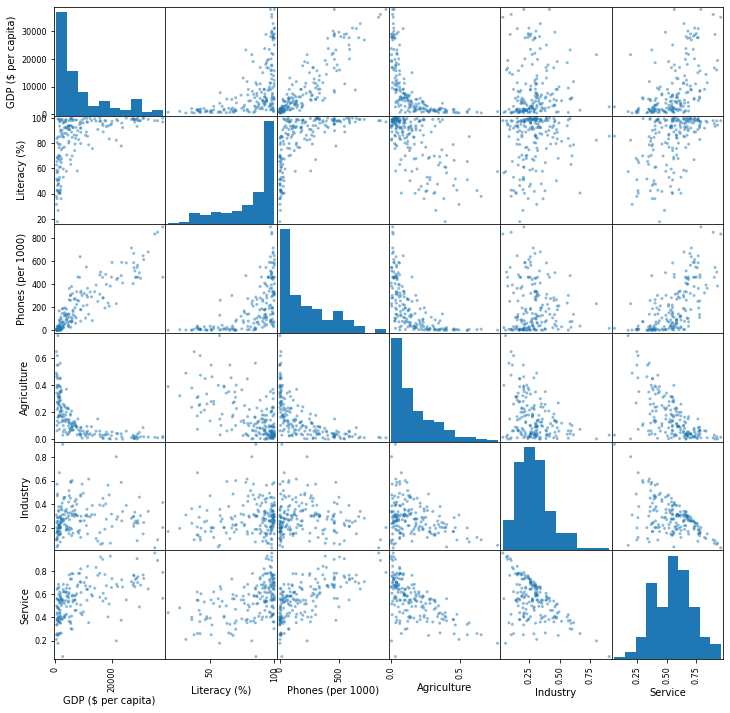

In [6]:
from pandas.plotting import scatter_matrix

#Diagrama de dispersión, con histogramas en la diagonal principal
scatter_matrix(df2, figsize = (12, 12), diagonal = 'hist')

#### Diagrama de Dispersión (usando Seaborn)

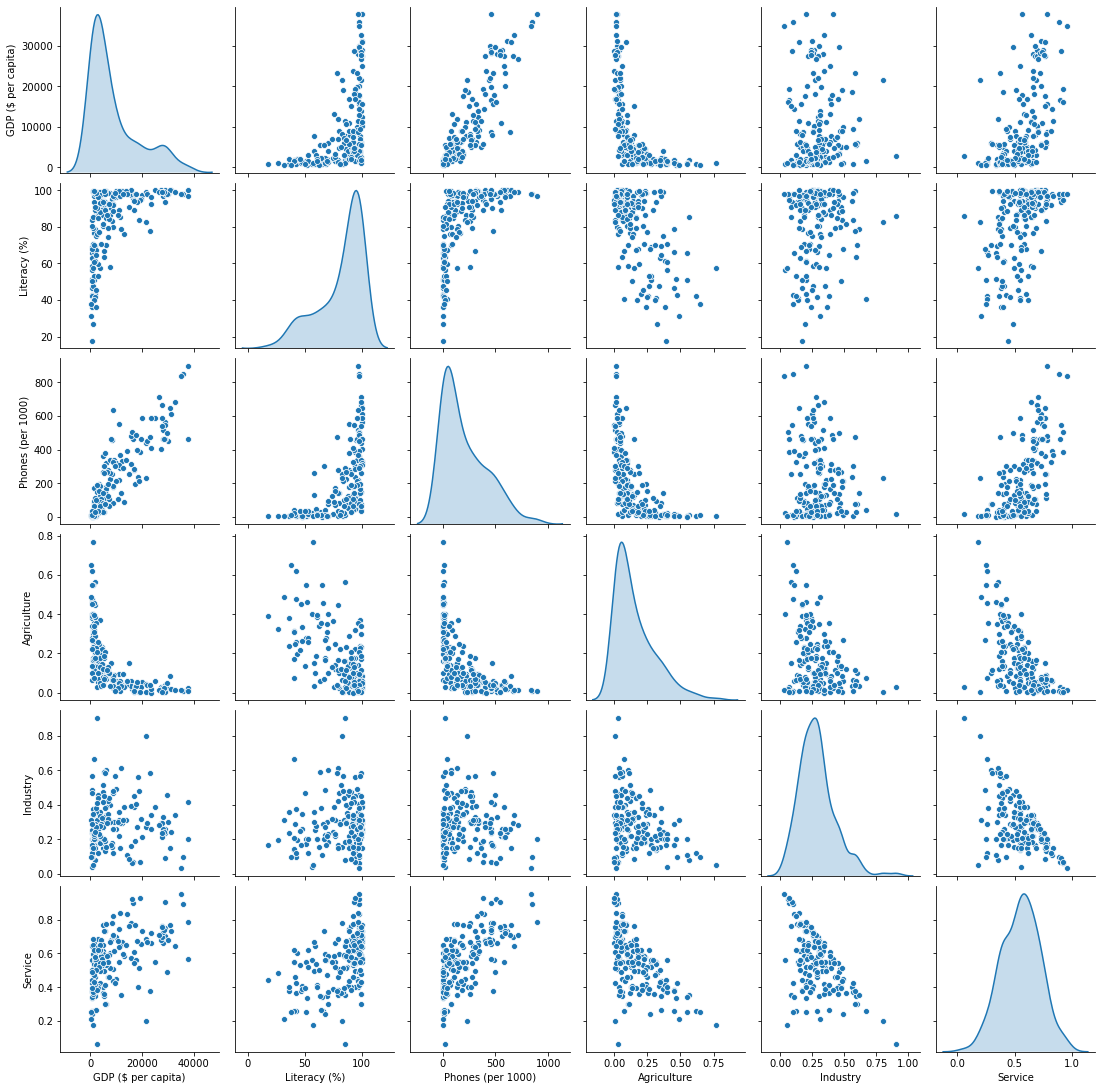

In [7]:
import seaborn as sns

sns.pairplot(df2, diag_kind='kde')

### Análisis del diagrama de dispersión

Algunas de las conclusiones que obtenemos al analizar el diagrama de dispersión son similares a las obtenidas con el coeficiente de correlación.

Podemos ver claramente, que como GDP y Phones están muy correlacionadas, su gráfica sigue una recta. Por tanto si aumenta el GDP también aumenta de manera directa el número de Phones. 

Otras variables que tienen bastante correlación son:

   - **GDP-Literacy:** su gráfica sigue una curva
   - **Phones-Literacy:** sigue también una curva.
   - **Industry-Service:** sigue una recta (con valores bajos dispersos)

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

### ¿Escalar los datos o no?

Pensamos que **es necesario cambiar las escalas de los datos** ya que las variables tienen **rangos de valores muy distintos**. 

Por ejemplo: Agriculture, Industry y Services tienen el mismo rango de valores (de 0 a 1), que representa en proporciones la presencia de cada actividad en el país. Sin embargo, la variable Literacy, que describe la proporción de la población alfabetizada, utiliza porcentajes con rango entre 0 y 100. Con respecto a la variable Phones, esta es expresada en proporción por cada 1.000 personas. Por último tenemos a la variable GDP que cubre un rango de valores mucho más amplio.

Como alguna de las variables que estamos escalando (Literacy, Phones y GDP) no siguen una distribución normal, tenemos que **normalizarlas** y no estandarizarlas. 

Una vez hagamos esto, evitaremos que alguna de las variables predomine sobre otras y por tanto afecte al cálculo de los clusters. Por ejemplo, la variable GDP predominaría notablemente sobre el resto si no la escalamos.

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# MinMaxScaler escala los datos al intervalo [0-1] sin modificar su distribución
# StandardScaler cambia la distribución para que estén centrados en 0 y tengan varianza 1 (como una normal). 

# Definir el escalador
scaler = MinMaxScaler()

# Acceder al array interno del dataframe y hacer una copia
copy = df2.to_numpy()
display('Data before scaled:',copy)

# Crear un nuevo array con los datos escalados
scaler.fit(copy)
scaledData = scaler.transform(copy)
display('Data after scaled:',scaledData)


'Data before scaled:'

array([[7.00e+02, 3.60e+01, 3.20e+00, 3.80e-01, 2.40e-01, 3.80e-01],
       [4.50e+03, 8.65e+01, 7.12e+01, 2.32e-01, 1.88e-01, 5.79e-01],
       [6.00e+03, 7.00e+01, 7.81e+01, 1.01e-01, 6.00e-01, 2.98e-01],
       ...,
       [8.00e+02, 5.02e+01, 3.72e+01, 1.35e-01, 4.72e-01, 3.93e-01],
       [8.00e+02, 8.06e+01, 8.20e+00, 2.20e-01, 2.90e-01, 4.89e-01],
       [1.90e+03, 9.07e+01, 2.68e+01, 1.79e-01, 2.43e-01, 5.79e-01]])

'Data after scaled:'

array([[0.00536193, 0.22330097, 0.0033415 , 0.49414824, 0.23798627,
        0.35650224],
       [0.10723861, 0.83616505, 0.0790822 , 0.30169051, 0.1784897 ,
        0.57959641],
       [0.14745308, 0.63592233, 0.08676765, 0.1313394 , 0.64988558,
        0.26457399],
       ...,
       [0.0080429 , 0.39563107, 0.04121185, 0.17555267, 0.50343249,
        0.37107623],
       [0.0080429 , 0.76456311, 0.00891067, 0.28608583, 0.29519451,
        0.47869955],
       [0.03753351, 0.88713592, 0.02962798, 0.23276983, 0.24141876,
        0.57959641]])

In [9]:
df3 = pd.DataFrame(data=scaledData, columns=['GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Agriculture', 'Industry', 'Service'])

df3

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
0,0.005362,0.223301,0.003342,0.494148,0.237986,0.356502
1,0.107239,0.836165,0.079082,0.301691,0.178490,0.579596
2,0.147453,0.635922,0.086768,0.131339,0.649886,0.264574
3,0.217158,0.939320,0.512141,0.052016,0.169336,0.804933
4,0.281501,0.866505,0.612274,0.049415,0.215103,0.763453
...,...,...,...,...,...,...
174,0.115282,0.919903,0.155825,0.052016,0.442792,0.536996
175,0.053619,0.882282,0.208844,0.271782,0.432494,0.357623
176,0.008043,0.395631,0.041212,0.175553,0.503432,0.371076
177,0.008043,0.764563,0.008911,0.286086,0.295195,0.478700


In [10]:
df3.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.231252,0.780875,0.231624,0.204038,0.292938,0.552139
std,0.258556,0.240747,0.234041,0.196805,0.160537,0.185728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.034853,0.635316,0.029962,0.050715,0.188787,0.406390
50%,0.123324,0.889563,0.152484,0.131339,0.276888,0.557175
75%,0.333780,0.973301,0.372912,0.302991,0.362700,0.679933
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


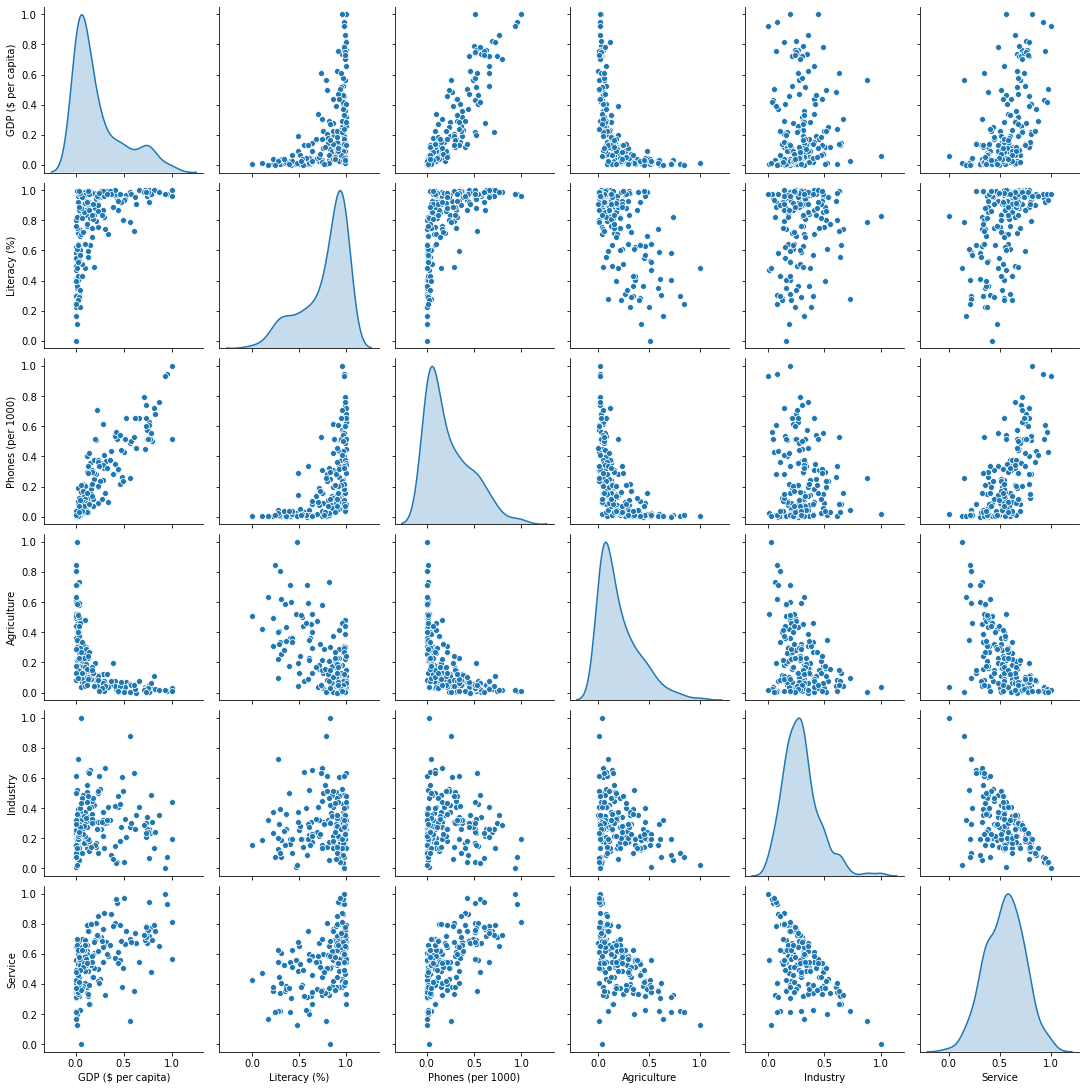

In [11]:
sns.pairplot(df3, diag_kind='kde')

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

K_MAX = 10
score = np.zeros(K_MAX-2)
davies_boulding = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    # Crear una instancia del agrupador k-means
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    # Agrupar los puntos en clusters
    km.fit(scaledData)
    #plot_clusters(scaledData, km.labels_, km.cluster_centers_)
    
    score[k-2] = -1 * km.score(scaledData)
    davies_boulding[k-2] = davies_bouldin_score(scaledData, km.labels_)
    silhouette[k-2] = silhouette_score(scaledData, km.labels_)

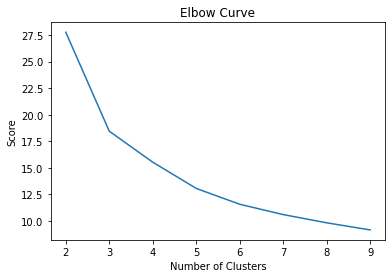

In [13]:
# diagrama del codo
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Análisis del diagrama del codo

En el diagrama del codo buscamos un valor de K en el que la curva deja de descender tan rápidamente. En este caso podemos ver que K=3 es una buena elección.

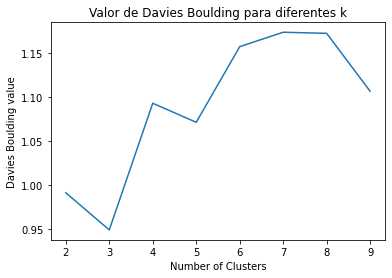

In [14]:
# davies boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

### Análisis de Davies Boulding

En este caso el mejor valor de Davies–Bouldin (el más pequeño) se obtiene para K = 3.

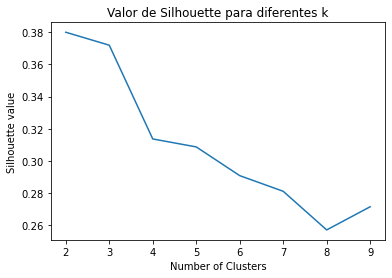

In [15]:
# silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

### Análisis de Silhouette

El mejor valor de Silhouette (el más cercano a 1) se obtiene para K=2.

### Conclusión con el número de Clusters

Hemos obtenido para la medida Davies-Boulding y en el diagrama del codo que 3 es el número más apropiado de clusters, mientras que la medida Silhoutte nos dice que el número más apropiado es 2 clusters. Como **no coinciden las tres medidas**, haremos uso de nuestro criterio para elegir el número óptimo de clusters.

**Creemos que el número más óptimo de clusters es 3**, ya que a pesar de que Silhoutte nos dice que el mejor número de cluster es 2, no hay mucha diferencia con respecto al valor de la gráfica en 3. Además la clasificación más común de países se hace en 3 categorías (países desarrollados, países en desarrollo y países sub-desarrolados). Dicho esto, también pensamos que si cojemos 2 como números de clusters estaría bien igualmente, ya que en Davies-Bouldin la diferencia entre los valores de la gráfica de 2 y 3 tienen poca diferencia (0,5).

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [16]:
# Crear una instancia del agrupador k-means
km = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)
# Agrupar los puntos en clusters
km.fit(scaledData)

centers = km.cluster_centers_
centers

array([[0.02629628, 0.4367641 , 0.0188783 , 0.44307335, 0.22936852,
        0.40912127],
       [0.6325067 , 0.96256068, 0.59030129, 0.03569571, 0.24439359,
        0.74515135],
       [0.16149901, 0.87767782, 0.1843625 , 0.15511393, 0.34652025,
        0.54128485]])

### Dataframe con el cluster al que pertenece cada país

In [17]:
# añadir una columna con el cluster al que pertenece cada punto
df5 = df2.assign(cluster=pd.Series(data=km.labels_))
df5

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
0,700.0,36.0,3.2,0.380,0.240,0.380,0
1,4500.0,86.5,71.2,0.232,0.188,0.579,2
2,6000.0,70.0,78.1,0.101,0.600,0.298,2
3,8600.0,95.0,460.0,0.040,0.180,0.780,1
4,11000.0,89.0,549.9,0.038,0.220,0.743,1
...,...,...,...,...,...,...,...
174,4800.0,93.4,140.1,0.040,0.419,0.541,2
175,2500.0,90.3,187.7,0.209,0.410,0.381,2
176,800.0,50.2,37.2,0.135,0.472,0.393,0
177,800.0,80.6,8.2,0.220,0.290,0.489,2


### Descripción de cada cluster

In [18]:
# mostramos la matriz transpuesta para que la info salga en vertical
df5.groupby(["cluster"]).describe().transpose()

cluster                             0             1             2
GDP ($ per capita) count    47.000000     40.000000     92.000000
                   mean   1480.851064  24092.500000   6523.913043
                   std     816.311508   7732.893030   4524.690981
                   min     500.000000   8600.000000    700.000000
                   25%     800.000000  17950.000000   3275.000000
                   50%    1300.000000  25900.000000   5450.000000
                   75%    1850.000000  29025.000000   9000.000000
                   max    4100.000000  37800.000000  21500.000000
Literacy (%)       count    47.000000     40.000000     92.000000
                   mean     53.589362     96.915000     89.920652
                   std      14.501683      3.872821      8.884504
                   min      17.600000     77.900000     58.000000
                   25%      42.300000     96.550000     85.025000
                   50%      52.900000     97.950000     92.250000
                   75%      65.950000     99.000000     97.350000
                   max      85.300000    100.000000     99.900000
Phones (per 1000)  count    47.000000     40.000000     92.000000
                   mean     17.148936    530.172500    165.720652
                   std      23.621378    138.167347    107.955035
                   min       0.200000    194.500000      3.700000
                   25%       3.600000    458.375000     75.075000
                   50%       9.700000    493.300000    141.500000
                   75%      19.550000    590.025000    260.525000
                   max     131.800000    898.000000    463.800000
Agriculture        count    47.000000     40.000000     92.000000
                   mean      0.340723      0.027450      0.119283
                   std       0.149452      0.019916      0.084219
                   min       0.073000      0.000000      0.002000
                   25%       0.243500      0.010750      0.058000
                   50%       0.322000      0.021500      0.099500
                   75%       0.424500      0.040000      0.164000
                   max       0.769000      0.086000      0.370000
Industry           count    47.000000     40.000000     92.000000
                   mean      0.232468      0.245600      0.334859
                   std       0.118078      0.115622      0.145356
                   min       0.040000      0.032000      0.088000
                   25%       0.167500      0.175000      0.229750
                   50%       0.204000      0.252000      0.311000
                   75%       0.281500      0.298000      0.412250
                   max       0.666000      0.585000      0.906000
Service            count    47.000000     40.000000     92.000000
                   mean      0.426936      0.726675      0.544826
                   std       0.124527      0.119561      0.134877
                   min       0.177000      0.375000      0.062000
                   25%       0.351500      0.671000      0.445000
                   50%       0.406000      0.729000      0.551500
                   75%       0.542000      0.780000      0.640750
                   max       0.643000      0.954000      0.818000

### Análisis de los clusters

Analizando la descripción de cada cluster podemos analizar primeramente la media en cada uno de los clusters para cada una de las variables:
            
- **GDP:** mean	24092.500000 (cluster 0)  6523.913043 (cluster 1) 	1480.851064 (cluster 2)
- **Literacy:** mean 96.915000 (cluster 0)	89.920652 (cluster 1)	53.589362 (cluster 2)
- **Phones:** mean 530.172500 (cluster 0) 	165.720652 (cluster 1)	17.148936 (cluster 2)
- **Agriculture:** mean	0.027450 (cluster 0)	0.119283 (cluster 1)	0.340723 (cluster 2)
- **Industry:** mean 0.245600 (cluster 0)	0.334859 (cluster 1)	0.232468 (cluster 2)
- **Services:** mean 0.726675 (cluster 0)	0.544826 (cluster 1)	0.426936 (cluster 2)

A partir de la **media** hemos deducido que el **cluster 0 agrupa los países más desarrollados**, el **cluster 1 agrupa los países en vía de desarrollo** y el **cluster 2 agrupa los países no desarrollados**. Hemos deducido esto ya que se observa la correlación directa que había entre el PIB, la alfabetización y el uso de la tecnología (características típicas de países desarrollados) y la correlación inversa entre el uso de la tecnología y el sector de la agricultura (característica más típica de países no desarrollados.

Si nos fijamos en **otras medidas** como el mínimo y máximo es **más difícil sacar conclusiones** respecto al tipo de países que agrupa cada cluster ya que los valores mínimos y máximos son rangos que se llegan a solapar entre los clusters. Por ejemplo, el mínimo-máximo en GDP va de (8600.000000-37800.000000) en el cluster 0, de (700.000000-21500.000000) en el cluster 1, y de	(500.000000-4100.000000) en el cluster 2.

### Distribución de GDP ($ per capita) en cada cluster

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: GDP ($ per capita), dtype: object

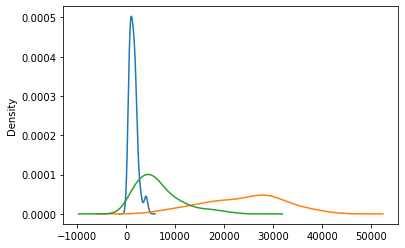

In [19]:
df5.groupby(["cluster"])["GDP ($ per capita)"].plot.density()

### Distribución de Literacy (%) en cada cluster

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Literacy (%), dtype: object

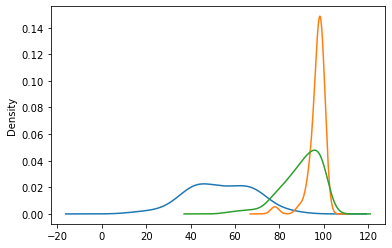

In [20]:
df5.groupby(["cluster"])["Literacy (%)"].plot.density()

### Distribución de Phones (per 1000) en cada cluster

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Phones (per 1000), dtype: object

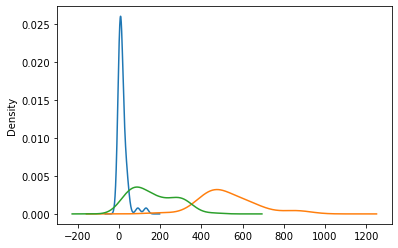

In [21]:
df5.groupby(["cluster"])["Phones (per 1000)"].plot.density()

### Distribución de Agriculture en cada cluster

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Agriculture, dtype: object

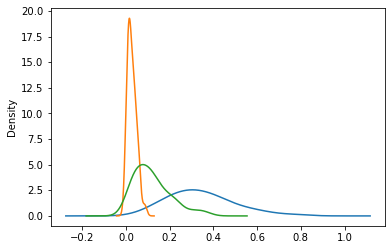

In [22]:
df5.groupby(["cluster"])["Agriculture"].plot.density()

### Distribución de Industry en cada cluster

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Industry, dtype: object

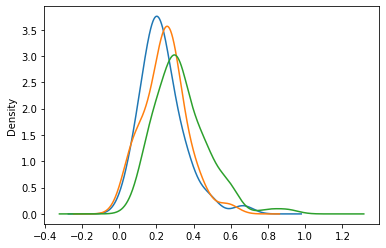

In [23]:
df5.groupby(["cluster"])["Industry"].plot.density()

### Distribución de Service en cada cluster

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Service, dtype: object

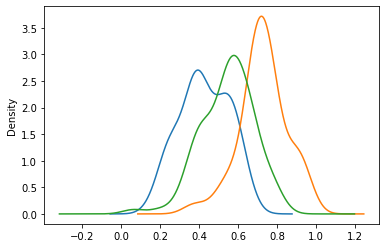

In [24]:
df5.groupby(["cluster"])["Service"].plot.density()

### Análisis de la distribución de cada cluster en función de cada variable

<em>¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?</em>

Los cluster que se separan mejor son el 0 (amarillo, países desarrollados) y el 2 (azul, países sub-desarrollados) con las variables `GDP`, `Phones`, `Literacy` y `Agruculture`.

Las que se confunden más son el cluster 0 (amarillo, países desarrollados) y 1 (verde, países en desarrollo) con las variables `GDP` y `Literay`.

Las variables que hacen confundir más los 3 clusters son `Industry` y `Service`, ya que son las que menos separan.